In [1]:
%matplotlib inline
# https://www.datasciencesociety.net/stochastic-processes-and-applications/
# https://www.investopedia.com/terms/r/randomwalktheory.asp

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as rm
from scipy.stats import norm
import itertools
import matplotlib.patches as mpatches

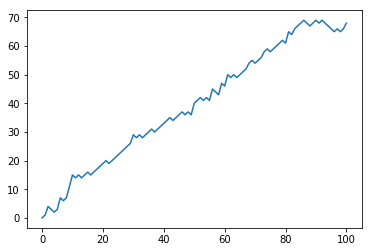

In [3]:
# Initialization
np.random.seed(99)
# Initialize all_walks
all_walks = []

# Simulate random walk 10 times
for i in range(10) :

    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)

        if dice <= 2:
            step = step - 1
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,5)
        random_walk.append(step)

    # Append random_walk to all_walks
    all_walks.append(random_walk)


#print(all_walks)

# Plot random_walk
plt.plot(random_walk)

# Show the plot
plt.show()


In [4]:
random_walk[-1]

68

In [6]:
np.random.randint(1,7)

3

In [7]:
np.random.randint(1,7)

6

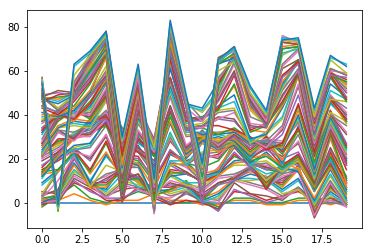

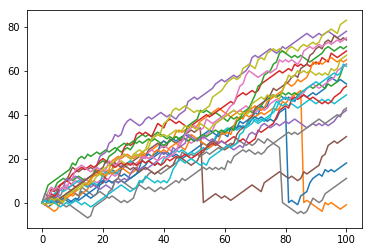

In [8]:
np.random.seed(99)
all_walks = []
for i in range(20) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = step - 1
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,5)
        if np.random.rand() <= 0.001 :
            step = 0
        random_walk.append(step)
    all_walks.append(random_walk)

# Convert all_walks to Numpy array: np_aw
np_aw = np.array(all_walks)

# Plot np_aw and show
plt.plot(np_aw)
plt.show()

# Clear the figure
plt.clf()

# Transpose np_aw: np_aw_t
np_aw_t = np.transpose(np_aw)

# Plot np_aw_t and show
plt.plot(np_aw_t)
plt.show()

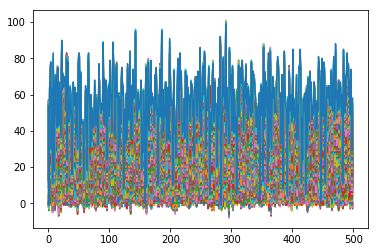

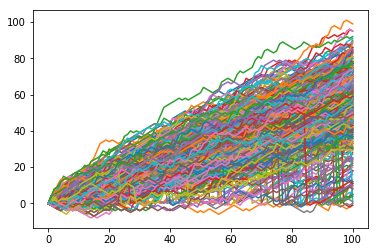

In [9]:
np.random.seed(99)
all_walks = []
for i in range(500) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = step - 1
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,5)
        if np.random.rand() <= 0.001 :
            step = 0
        random_walk.append(step)
    all_walks.append(random_walk)

# Convert all_walks to Numpy array: np_aw
np_aw = np.array(all_walks)

# Plot np_aw and show
plt.plot(np_aw)
plt.show()

# Clear the figure
plt.clf()

# Transpose np_aw: np_aw_t
np_aw_t = np.transpose(np_aw)

# Plot np_aw_t and show
plt.plot(np_aw_t)
plt.show()

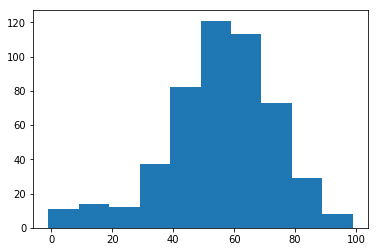

The odds of the ending point being above 40 is 84.00%


In [10]:
# Select last row from np_aw_t: ends
ends = np_aw_t[-1]

# Plot histogram of ends, display plot
plt.hist(ends)
plt.show()

#lets caclulate the odds of the ending point being above 40
bool = ends >= 40
greater = sum(bool)
print("The odds of the ending point being above 40 is " + "{:0.2%}".format(greater / 500))

In [11]:
# Brownian Motion steps
for i in range(0, 50):
    xt = 0 + norm.rvs(scale=1**2* 4)
    #print(xt)

In [12]:
def generate_brownian(x0, n, dt, delta, output=None):
    x0 = np.asarray(x0)
    r = norm.rvs(size=x0.shape + (n,), scale=delta* np.sqrt(dt))
    if output is None:
        output = np.empty(r.shape) 
        
    np.cumsum(r, axis=-1, out = output)
    output += np.expand_dims(x0, axis=-1)

    return output

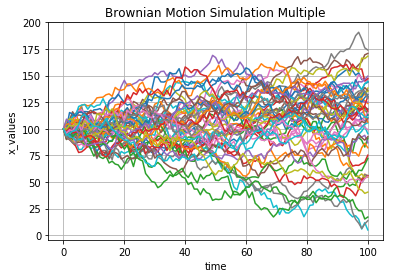

In [13]:
x = np.empty((50,101))
x[:, 0] = 100

generate_brownian(x[:, 0], 100, 1, 4, output=x[:,1:])

time = np.linspace(0, 100, 101)
for k in range(50):
    plt.plot(time, x[k])
plt.title('Brownian Motion Simulation Multiple')
plt.xlabel('time')
plt.ylabel('x_values')
plt.grid(True)
plt.show()

In [14]:
def poisson_process(lambdas, number):
    X_T = np.random.poisson(lambdas, size=number)
    S = [np.sum(X_T[0:i]) for i in range(number)]
    X = np.linspace(0, number, number)
    graphs = [plt.step(X, S, label="Lambda = %d"%lambdas)[0] for i in range(lambdas)]
    graph = plt.step(X, S, label="Lambda = %d"%lambdas)
    plt.legend(handles=graph, loc=2)
    plt.title('Poisson Process')
    plt.xlabel('time')
    plt.ylabel('intensity')
#The legend does not display perfectly so the parameters have been split.

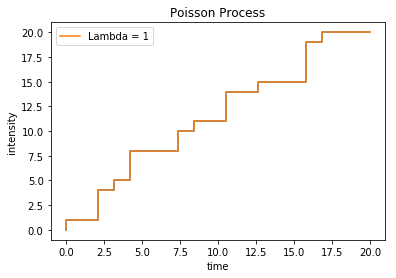

In [15]:
poisson_process(1, 20)
plt.show()

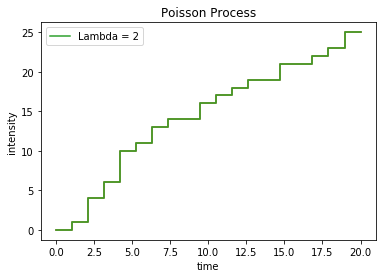

In [16]:
poisson_process(2, 20)
plt.show()

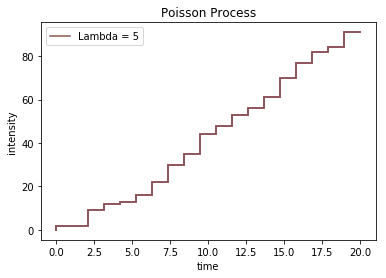

In [17]:
poisson_process(5, 20)
plt.show()

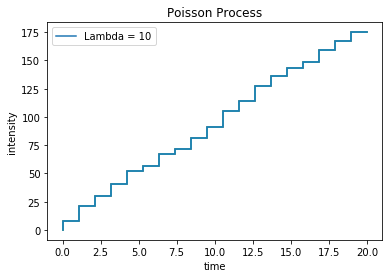

In [18]:
poisson_process(10, 20)
plt.show() 

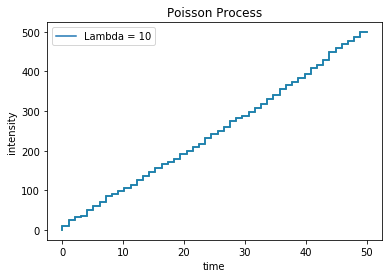

In [19]:
poisson_process(10, 50)
plt.show()

## Markov Chains
The Markov Chain is named after the Russian mathematician Andrey Markov (1856 - 1922). 
A Markov Chain is defined as a stochastic process that posses the Markov Property. We have a process that moves from one state to another, the new state depends only on the current position and not on the historical positions. This is also known as memoryless. This is a discrete time process, the alternative for a continuous type is a Markov process. The change of positions can be represented with a transition matrix.

It should be notes that the Weiner process and the Poisson Process are a subset of the Markov Process. 
Some of examples of the use are modeling the price of an asset, the temperature, the change of the landscape height above sea level, population growth, currency rates exchange rate (like cryptocurrencies for example), PageRank is based on Markov Process. https://en.wikipedia.org/wiki/PageRank 

In [20]:
# Different States
states = ["Rise","Fall","Static"]

# Possible sequences of events
transitionName = [["SS","SR","SF"],["RR","RS","RF"],["FR","FS","FF"]]

# Transition matrix
transitionMatrix = [[0.2,0.6,0.2],[0.15,0.5,0.35],[0.05,0.55,0.4]]

In [21]:
if (sum(transitionMatrix[0])+sum(transitionMatrix[1])+sum(transitionMatrix[2])) != 3:
    print("Error! The probablilities for every position must be 1")

In [22]:
def activity_forecast(hours):
    # Lets start with Static State
    activityNow = "Static"
    print("Start state: " + activityNow)
    activityList = [activityNow]
    i = 0
    # To calculate the probability of the activityList
    prob = 1
    while i != hours:
        if activityNow == "Static":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SS":
                prob = prob * 0.2
                activityList.append("Static")
                pass
            elif change == "SR":
                prob = prob * 0.6
                activityNow = "Rise"
                activityList.append("Rise")
            else:
                prob = prob * 0.2
                activityNow = "Fall"
                activityList.append("Fall")
        elif activityNow == "Rise":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "RR":
                prob = prob * 0.15
                activityList.append("Rise")
                pass
            elif change == "RS":
                prob = prob * 0.5
                activityNow = "Static"
                activityList.append("Static")
            else:
                prob = prob * 0.35
                activityNow = "Fall"
                activityList.append("Fall")
                "FR","FS","FR"
        elif activityNow == "Fall":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "FR":
                prob = prob * 0.05
                activityNow = "Static"
                activityList.append("Rise")
                pass
            elif change == "FS":
                prob = prob * 0.55
                activityNow = "Static"
                activityList.append("Static")
            else:
                prob = prob * 0.4
                activityNow = "Fall"
                activityList.append("Fall")
        i += 1  
    print("Possible states: " + str(activityList))
    print("End state after "+ str(hours) + " hours: " + activityNow)
    print("Probability of the possible sequence of states: " + str(prob))

#Forcast for the next 5 hours
activity_forecast(5)

Start state: Static
Possible states: ['Static', 'Static', 'Rise', 'Static', 'Fall', 'Static']
End state after 5 hours: Static
Probability of the possible sequence of states: 0.006600000000000001


We define the activity_forecast function with the argument hours to start the simulation. The beginning state is set to 'Static'. An if-else conditional statement is used to generate different outcomes. Finally we generate a simulation for 5 periods in the future and the probability of fallowing this particular path.

In [23]:
def activity_forecast(hours):
    activityNow = "Static"
    activityList = [activityNow]
    i = 0
    prob = 1
    while i != hours:
        if activityNow == "Static":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SS":
                prob = prob * 0.2
                activityList.append("Static")
                pass
            elif change == "SR":
                prob = prob * 0.6
                activityNow = "Rise"
                activityList.append("Rise")
            else:
                prob = prob * 0.2
                activityNow = "Fall"
                activityList.append("Fall")
        elif activityNow == "Rise":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "RR":
                prob = prob * 0.15
                activityList.append("Rise")
                pass
            elif change == "RS":
                prob = prob * 0.5
                activityNow = "Static"
                activityList.append("Static")
            else:
                prob = prob * 0.35
                activityNow = "Fall"
                activityList.append("Fall")
                "FR","FS","FR"
        elif activityNow == "Fall":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "FR":
                prob = prob * 0.05
                activityNow = "Static"
                activityList.append("Rise")
                pass
            elif change == "FS":
                prob = prob * 0.55
                activityNow = "Static"
                activityList.append("Static")
            else:
                prob = prob * 0.4
                activityNow = "Fall"
                activityList.append("Fall")
        i += 1    
    return activityList

list_activity = []
count = 0

for iterations in range(1,10000):
        list_activity.append(activity_forecast(2))
  
print(list_activity[0:5])
#we can view the first 5 outputs

[['Static', 'Static', 'Rise'], ['Static', 'Fall', 'Fall'], ['Static', 'Rise', 'Fall'], ['Static', 'Rise', 'Fall'], ['Static', 'Rise', 'Fall']]


Now we used a similar example to test 10000 iterations. Now we will apply the Law of Large Numbers to get the probability of starting from a position of Static to a positions of Rise and Fall.

In [24]:
for smaller_list in list_activity:
    if(smaller_list[2] == "Rise"):
        count += 1
        
#what is the probability of starting with static and ending with Rise.
percentage = (count/10000) * 100
print("The probability of starting at state:'Static' and ending at state:'Rise'= " + str(percentage) + "%")

The probability of starting at state:'Static' and ending at state:'Rise'= 22.43%


In [25]:
for smaller_list in list_activity:
    if(smaller_list[2] == "Fall"):
        count += 1
        
#what is the probability of starting with static and ending with Fall.
percentage = (count/10000) * 100
print("The probability of starting at state:'Static' and ending at state:'Fall'= " + str(percentage) + "%")

The probability of starting at state:'Static' and ending at state:'Fall'= 54.81%


In [26]:
for smaller_list in list_activity:
    if(smaller_list[2] == "Static"):
        count += 1
        
#what is the probability of starting with static and ending with Static.
percentage = (count/10000) * 100
print("The probability of starting at state:'Static' and ending at state:'Static'= " + str(percentage) + "%")
#There is an error it should be 1 - percentage_for_fall - percentage_for_rise

The probability of starting at state:'Static' and ending at state:'Static'= 99.99%


The code above should be run only once or else it will increase above 100% witch will not be a realistic assumption. It should be the complement probability to the other two. Meaning approximately 23 % (1 - 0.55 - 0.22).
